<a href="https://colab.research.google.com/github/Abishek-Subramaniam/Confidence-Interval-and-Central-Limit-Theorem/blob/main/Abishek_S_Walmart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import boxcox

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 129MB/s] 


In [ ]:
df=pd.read_csv('walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
# to check the number of null values
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64


*   User_ID:	User ID
*   Product_ID:	Product ID

*   Gender:	Sex of User
*   Age:	Age in bins

*   Occupation:	Occupation(Masked)
*   City_Category:	Category of the City (A,B,C)

*   StayInCurrentCityYears:	Number of years stay in current city
*   Marital_Status:	Marital Status

*   ProductCategory:	Product Category (Masked)
*   Purchase:	Purchase Amount

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


#Tracking the amount spent per transaction of all the 50 million female customers

In [ ]:
f_customer=df[df['Gender']=='F']
f_customer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [ ]:
row,column=f_customer.shape
print(row,column)

135809 10


In [ ]:
f_customer['Purchase'].min()

12

In [ ]:
f_customer['Purchase'].max()

23959

In [ ]:
f_customer['Purchase'].mean()

8734.565765155476

In [ ]:
amount_spent=f_customer['Purchase']
amount_spent.describe()

count    135809.000000
mean       8734.565765
std        4767.233289
min          12.000000
25%        5433.000000
50%        7914.000000
75%       11400.000000
max       23959.000000
Name: Purchase, dtype: float64

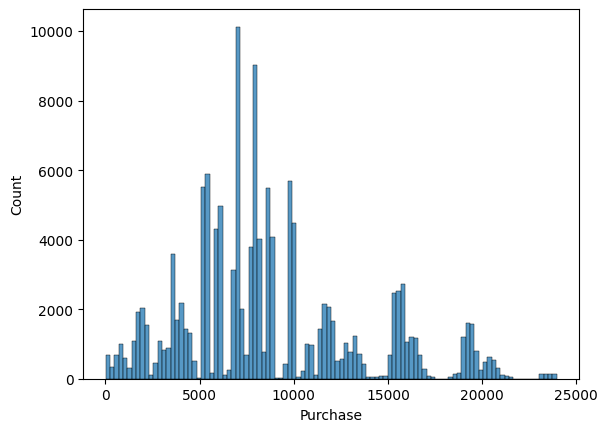

In [ ]:
sns.histplot(amount_spent)

plt.show()

In [ ]:
# using 100 samples of amount spent per transaction by female customers

sample_100 = [np.mean(amount_spent.sample(100)) for i in range(10000) ]

#mean for 100 samples
print(np.mean(sample_100))
print(np.std(sample_100))

8737.099889000001
477.9521913630878


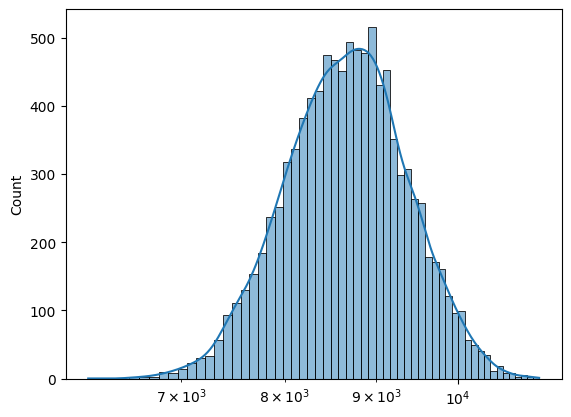

In [ ]:
sns.histplot(sample_100, kde=True)
plt.xscale('log')

plt.show()

In [ ]:
# using 300 samples of amount spent per transaction by female customers

sample_300 = [np.mean(amount_spent.sample(300)) for i in range(10000) ]

#mean for 300 samples
print(np.mean(sample_300))
print(np.std(sample_300))

8731.713609
271.45362021538904


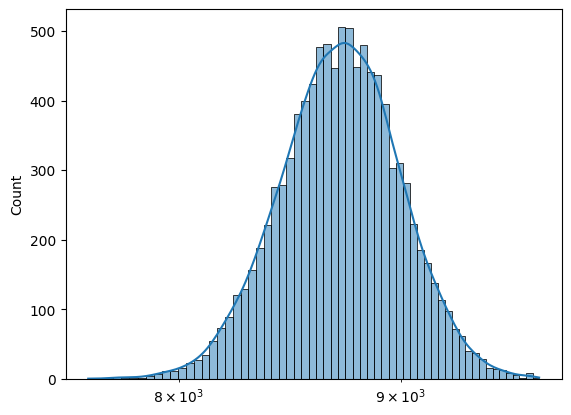

In [ ]:
sns.histplot(sample_300, kde=True)
plt.xscale('log')

plt.show()

In [ ]:
# population mean
mu = round(amount_spent.mean(),2)

# population SD
sigma = round(amount_spent.std(),2)

# mean of sample distributions having sample size = 100
mu_100 = round(np.mean(sample_100),2)

# SD of sample distributions having sample size = 100
sigma_100 = round(np.std(sample_100),2)

# mean of sample distributions having sample size = 300
mu_300 = round(np.mean(sample_300),2)

# SD of sample distributions having sample size = 300
sigma_300 = round(np.std(sample_300),2)

print(mu, mu_100, mu_300)
print(sigma, sigma_100, sigma_300)

8734.57 8737.1 8731.71
4767.23 477.95 271.45



*   We can see that as **sample size increases** the distribution of mean of samples gets **closer** to the original population mean.
*   Also as sample size increases the **variance / SD of means gets lesser**.


*   from a given dataset, for only female customer the average amount spent per transaction is around **8734.57** , also from random samples of **100 and 300** means we can see that average amount spent are close to population mean **8737.65 and 8731.99**






In [ ]:
# from given dataset, for female customer we know standard deviation, number of female customers
# and sample and population mean with these deatils we can define the 90 % confidence interval

n = row
sample_mean = mu

# std deviation  sigma/sqrt(n)
std_error = sigma/np.sqrt(n)

# We want to construct 90% confidence interval
# So we will have 5% data till z1 so z1 will be
z1 = norm.ppf(0.05)

# z2 will be
z2 = norm.ppf(1 - 0.05)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)


# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 90% confidence interval:",confidence_interval)

 90% confidence interval: (8713.29, 8755.85)


In [ ]:
n = row
sample_mean = mu

# std deviation  sigma/sqrt(n)
std_error = sigma/np.sqrt(n)

# We want to construct 95% confidence interval
z1 = norm.ppf(0.025)

# z2 will be
z2 = norm.ppf(1 - 0.025)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)

# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 95% confidence interval:",confidence_interval)

 95% confidence interval: (8709.22, 8759.92)


In [ ]:
n = row
sample_mean = mu

# std deviation  sigma/sqrt(n)
std_error = sigma/np.sqrt(n)

# We want to construct 99% confidence interval
z1 = norm.ppf(0.005)

# z2 will be
z2 = norm.ppf(1 - 0.005)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)

# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 99% confidence interval:",confidence_interval)

 99% confidence interval: (8701.25, 8767.89)


Using central limit theorem with confidence interval of 90%, 95%, 99% for amount per transaction by female customers , we can see that the confidence range lies between


*   At 90% confidence level , we have data lies around **(8713.29, 8755.85)**
*   At 95% confidence level , we have data lies around **(8709.22, 8759.92)**
*  At 99% confidence level , we have data lies around **(8701.25, 8767.89)**





#Tracking the amount spent per transaction of all the 50 million male customers

In [ ]:
m_customer=df[df['Gender']=='M']
m_customer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [ ]:
m_row,m_column=m_customer.shape
print(m_row,m_column)

414259 10


In [ ]:
m_customer['Purchase'].min()

12

In [ ]:
m_customer['Purchase'].max()

23961

In [ ]:
m_customer['Purchase'].mean()

9437.526040472265

In [ ]:
m_amount_spent=m_customer['Purchase']
m_amount_spent.describe()

count    414259.00000
mean       9437.52604
std        5092.18621
min          12.00000
25%        5863.00000
50%        8098.00000
75%       12454.00000
max       23961.00000
Name: Purchase, dtype: float64

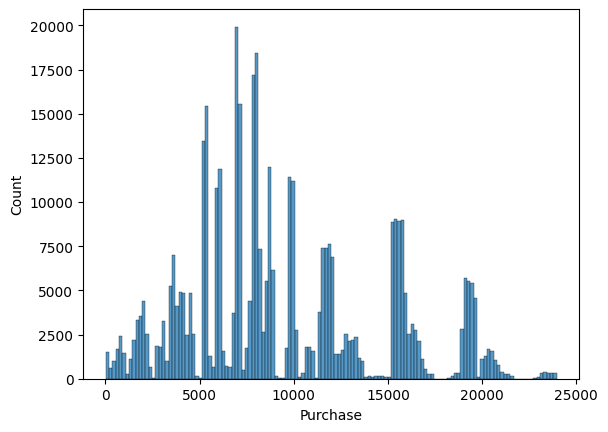

In [ ]:
sns.histplot(m_amount_spent)

plt.show()

In [ ]:
# using 100 samples of amount spent per transaction by male customers

m_sample_100 = [np.mean(m_amount_spent.sample(100)) for i in range(5000) ]

#mean for 50 samples
print(np.mean(m_sample_100))
print(np.std(m_sample_100))

9435.109414
509.2993997829927


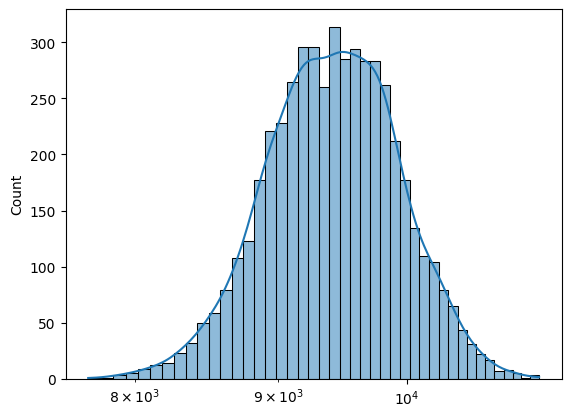

In [ ]:
sns.histplot(m_sample_100, kde=True)
plt.xscale('log')

plt.show()

In [ ]:
# using 300 samples of amount spent per transaction by male customers

m_sample_300 = [np.mean(m_amount_spent.sample(300)) for i in range(5000) ]

#mean for 300 samples
print(np.mean(m_sample_300))
print(np.std(m_sample_300))

9438.870918
296.8993926697047


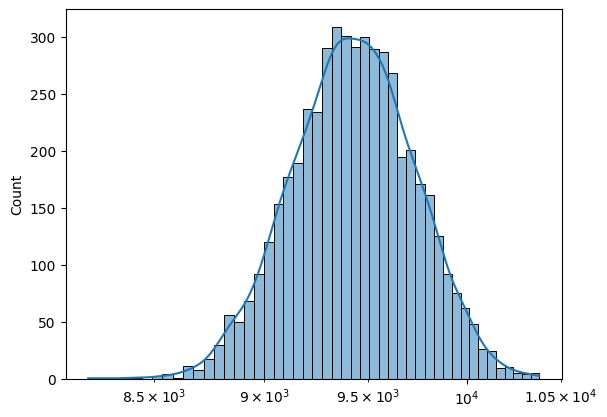

In [ ]:
sns.histplot(m_sample_300, kde=True)
plt.xscale('log')

plt.show()

In [ ]:
# population mean
m_mu = round(m_amount_spent.mean(),2)

# population SD
m_sigma = round(m_amount_spent.std(),2)

# mean of sample distributions having sample size = 100
m_mu_100 = round(np.mean(m_sample_100),2)

# SD of sample distributions having sample size = 100
m_sigma_100 = round(np.std(m_sample_100),2)

# mean of sample distributions having sample size = 300
m_mu_300 = round(np.mean(m_sample_300),2)

# SD of sample distributions having sample size = 300
m_sigma_300 = round(np.std(m_sample_300),2)

print(m_mu, m_mu_100, m_mu_300)
print(m_sigma, m_sigma_100, m_sigma_300)

9437.53 9435.11 9438.87
5092.19 509.3 296.9


From a given dataset, for only male customer the average amount spent per transaction is around **9437.53** , also from random samples of **100 and 300** means we can see that average amount spent are close to population mean **9435.55 and 9438.99**

In [ ]:
# from given dataset, for male customer we know standard deviation, number of male customers
# and sample and population mean with these deatils we can define the 90 % confidence interval

n = m_row
sample_mean = m_mu

# std deviation  sigma/sqrt(n)
std_error = m_sigma/np.sqrt(n)

# We want to construct 90% confidence interval
# So we will have 5% data till z1 so z1 will be
z1 = norm.ppf(0.05)

# z2 will be
z2 = norm.ppf(1 - 0.05)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)


# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 90% confidence interval:",confidence_interval)

 90% confidence interval: (9424.52, 9450.54)


In [ ]:
n = m_row
sample_mean = m_mu

# std deviation  sigma/sqrt(n)
std_error = m_sigma/np.sqrt(n)

# We want to construct 95% confidence interval
z1 = norm.ppf(0.025)

# z2 will be
z2 = norm.ppf(1 - 0.025)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)

# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 95% confidence interval:",confidence_interval)

 95% confidence interval: (9422.02, 9453.04)


In [ ]:
n = m_row
sample_mean = m_mu

# std deviation  sigma/sqrt(n)
std_error = m_sigma/np.sqrt(n)

# We want to construct 99% confidence interval
z1 = norm.ppf(0.005)

# z2 will be
z2 = norm.ppf(1 - 0.005)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)

# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print("99% confidence interval:",confidence_interval)

99% confidence interval: (9417.15, 9457.91)


Using central limit theorem with confidence interval of 90%, 95%, 99% for amount per transaction by male customers , we can see that the confidence range lies between,

*   At 90% confidence level , we have data lies around **(9424.52, 9450.54)**
*   At 95% confidence level , we have data lies around **(9422.02, 9453.04)**
*   At 99% confidence level , we have data lies around **(9417.15, 9457.91)**



#Are women spending more money per transaction than men? Why or Why not?

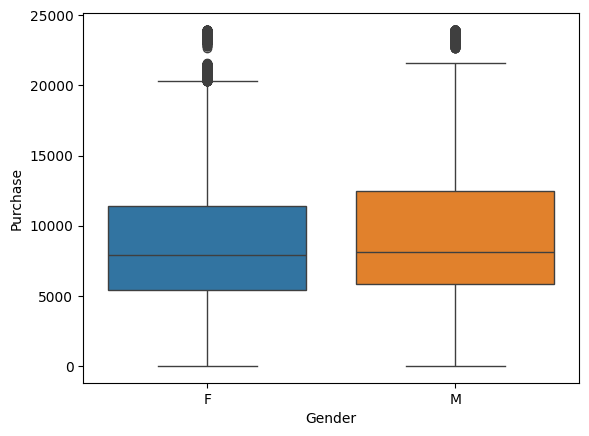

In [ ]:
sns.boxplot(data=df,x='Gender',y='Purchase',hue='Gender')
plt.show()

In [ ]:
f_customer.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [ ]:
f_customer['total_transaction_by_each'] = f_customer.groupby('User_ID')['Purchase'].transform('count')
f_customer.head()

<ipython-input-40-8d9625ebaea1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_customer['total_transaction_by_each'] = f_customer.groupby('User_ID')['Purchase'].transform('count')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,total_transaction_by_each
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,35
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,35
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,35
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,35
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378,47


In [ ]:
total_purchase = f_customer[['User_ID', 'total_transaction_by_each']].drop_duplicates()
total_purchase

,User_ID,total_transaction_by_each
0,1000001,35
14,1000006,47
29,1000010,223
47,1000011,70
65,1000016,22
...,...,...
158271,1000455,14
158641,1000527,12
159635,1000703,12
183417,1004293,25


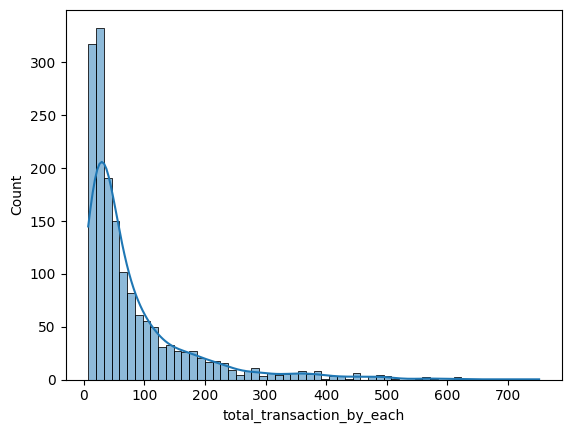

In [ ]:
sns.histplot(x=total_purchase['total_transaction_by_each'],kde=True)
plt.show()

In [ ]:
total_purchase['total_transaction_by_each'].describe()

count    1666.000000
mean       81.518007
std        95.755331
min         7.000000
25%        23.000000
50%        45.000000
75%        99.750000
max       752.000000
Name: total_transaction_by_each, dtype: float64

In [ ]:
m_customer['total_transaction_by_each'] = m_customer.groupby('User_ID')['Purchase'].transform('count')
m_customer.head()

<ipython-input-44-d2a5a4fe5ed7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_customer['total_transaction_by_each'] = m_customer.groupby('User_ID')['Purchase'].transform('count')


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,total_transaction_by_each
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,77
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227,29
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215,14
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854,14
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686,14


In [ ]:
total_purchase_m = m_customer[['User_ID', 'total_transaction_by_each']].drop_duplicates()
total_purchase_m

,User_ID,total_transaction_by_each
4,1000002,77
5,1000003,29
6,1000004,14
9,1000005,106
18,1000007,17
...,...,...
166229,1001674,16
187076,1004871,12
221494,1004113,20
229480,1005391,7


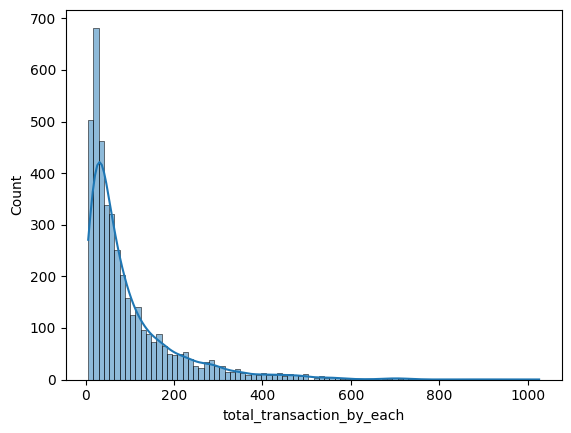

In [ ]:
sns.histplot(x=total_purchase_m['total_transaction_by_each'],kde=True)
plt.show()

In [ ]:
total_purchase_m['total_transaction_by_each'].describe()

count    4225.000000
mean       98.049467
std       111.039881
min         6.000000
25%        27.000000
50%        58.000000
75%       123.000000
max      1026.000000
Name: total_transaction_by_each, dtype: float64



*   The average amount spend per transaction by female users **8734.57** is less than the average amount spend by male users for per purchase **9437.53**.
*   There are more male users **4225** than the female users **1666**.
*   The average number of purchase made by a female customer **81.51** is less than male customer **98.04** .

#Confidence intervals and distribution of the mean of the expenses by female and male customers


Using central limit theorem with confidence interval of 90%, 95%, 99% for amount per transaction by male customers , we can see that the confidence range lies between,


*   At 90% confidence level , we have data lies around **(9424.52, 9450.54)**

*   At 95% confidence level , we have data lies around **(9422.02, 9453.04)**

*   At 99% confidence level , we have data lies around **(9417.15, 9457.91)**


Using central limit theorem with confidence interval of 90%, 95%, 99% for amount per transaction by female customers , we can see that the confidence range lies between

*   At 90% confidence level , we have data lies around **(8713.29, 8755.85)**


*   At 95% confidence level , we have data lies around **(8709.22, 8759.92)**


*   At 99% confidence level , we have data lies around **(8701.25, 8767.89)**



#Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?

For male customers:

At a 90% confidence level: (9424.52, 9450.54)
At a 95% confidence level: (9422.02, 9453.04)
At a 99% confidence level: (9417.15, 9457.91)

For female customers:

At a 90% confidence level: (8713.29, 8755.85)
At a 95% confidence level: (8709.22, 8759.92)
At a 99% confidence level: (8701.25, 8767.89)

The confidence intervals for both male and female customers **do not overlap**. This suggests that there is a **statistically significant difference** between the average amount spent per transaction by male and female customers.

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


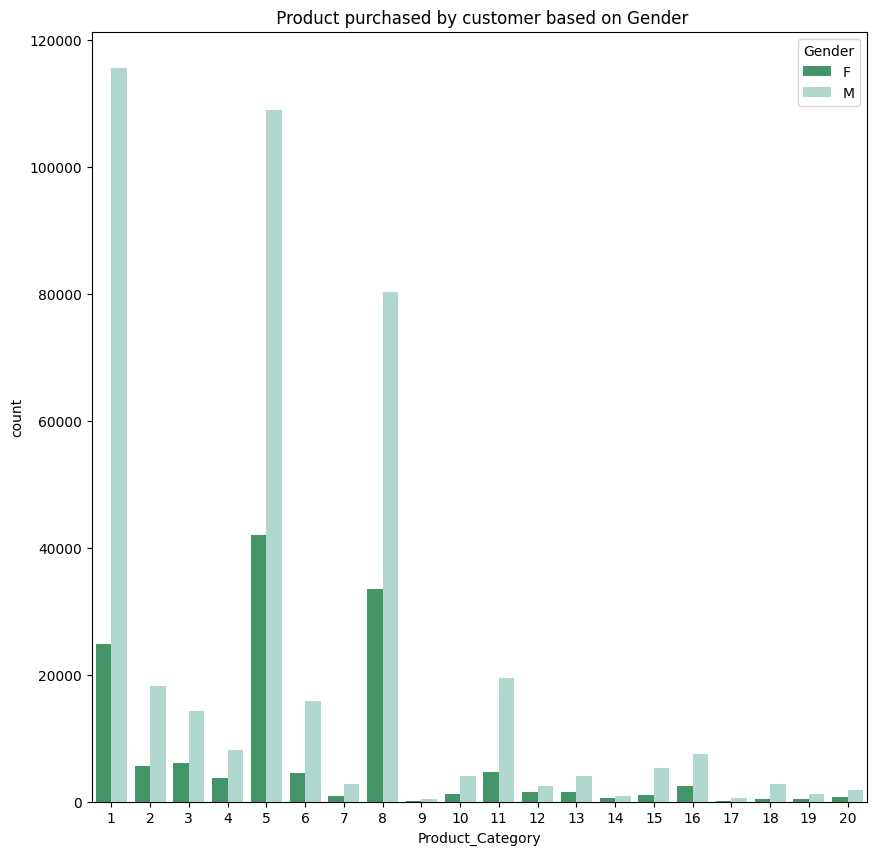

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df,x='Product_Category',hue='Gender',palette='BuGn_r')
plt.title(" Product purchased by customer based on Gender")

plt.show()

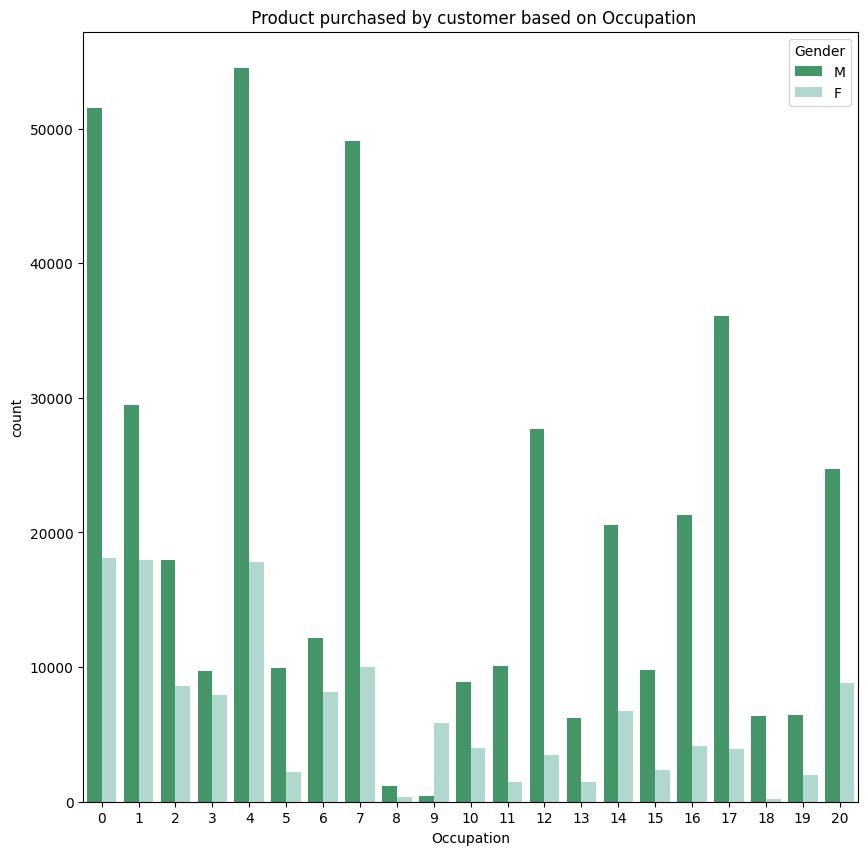

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df,x='Occupation',hue='Gender',palette='BuGn_r')
plt.title(" Product purchased by customer based on Occupation")

plt.show()

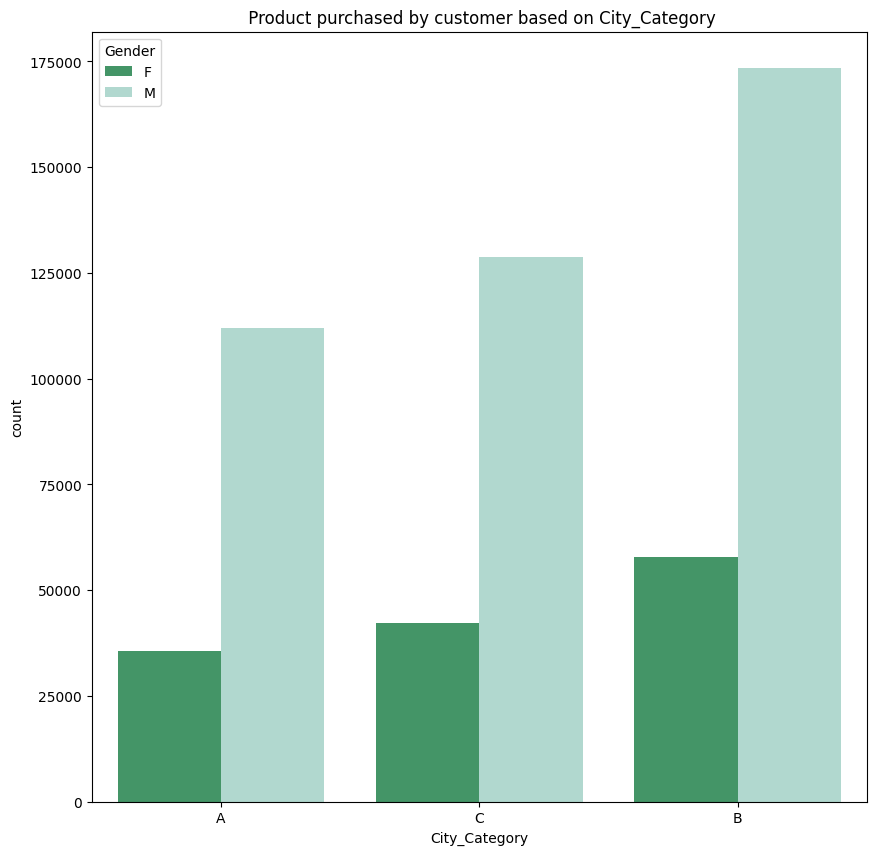

In [ ]:
plt.figure(figsize=(10, 10))
sns.countplot(data=df,x='City_Category',hue='Gender',palette='BuGn_r')
plt.title(" Product purchased by customer based on City_Category")

plt.show()

#How can Walmart leverage this conclusion to make changes or improvements?



*   From the above plots we can see that the number of female customers are relatively lower than the male customers.
*   Walmart needs to increase the number of female customers by introducing more product category and discounts that attracts larger female customers and promote products in all city.



#Results when the same activity is performed for Married vs Unmarried

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [ ]:
f_customer['Marital_Status'].value_counts()

0    78821
1    56988
Name: Marital_Status, dtype: int64

In [ ]:
m_customer['Marital_Status'].value_counts()

0    245910
1    168349
Name: Marital_Status, dtype: int64

In [ ]:
user_married=df[df['Marital_Status']==1]
r,c=user_married.shape
print(r,c)

225337 10


In [ ]:
user_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254


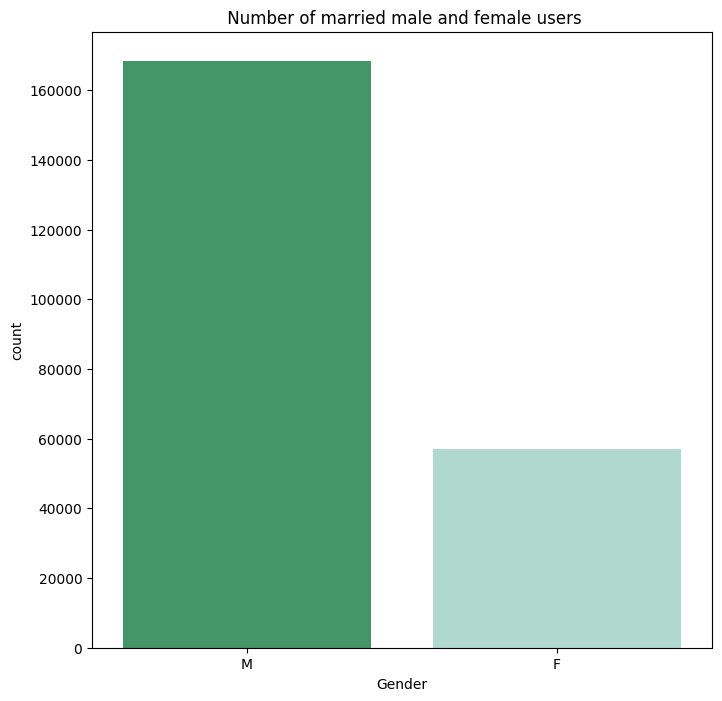

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=user_married,x='Gender',hue='Gender',palette='BuGn_r')
plt.title(" Number of married male and female users")

plt.show()

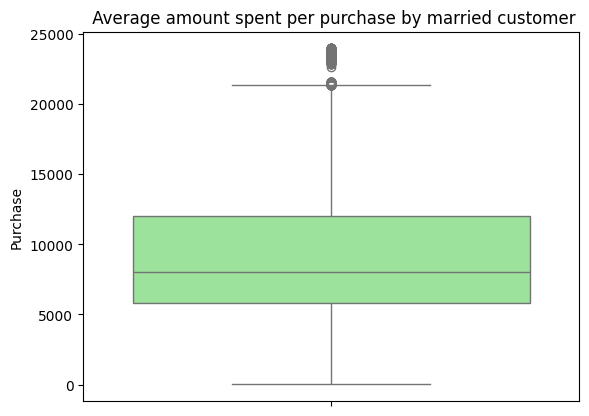

In [ ]:
sns.boxplot(data=user_married,y='Purchase',color='lightgreen')
plt.title(" Average amount spent per purchase by married customer")

plt.show()

In [ ]:
user_married['Purchase'].describe()

count    225337.000000
mean       9261.174574
std        5016.897378
min          12.000000
25%        5843.000000
50%        8051.000000
75%       12042.000000
max       23961.000000
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Count'>

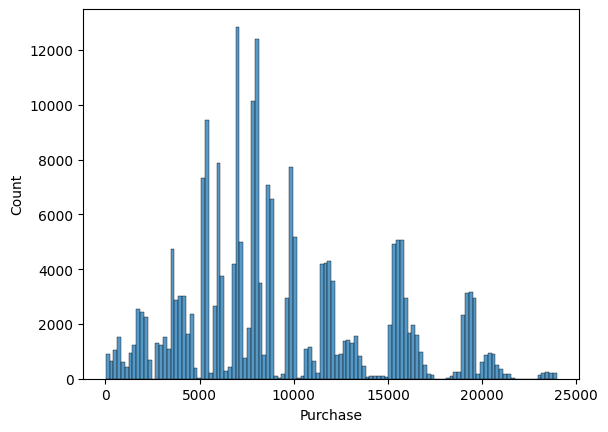

In [ ]:
sns.histplot(user_married['Purchase'])

In [ ]:
#lets take 50 smaples of marrired customer and work with 90, 95, 99 confidence interval.

s50=[np.mean(user_married['Purchase'].sample(50)) for i in range(5000) ]

#mean for 50 samples
print(np.mean(s50))
print(np.std(s50))

9257.335312000001
703.235839889594


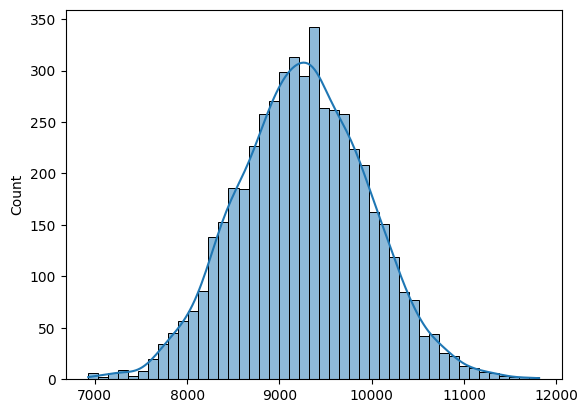

In [ ]:
sns.histplot(s50, kde=True)

plt.show()

In [ ]:
#lets take 150 smaples of marrired customer and work with 90, 95, 99 confidence interval.

s150=[np.mean(user_married['Purchase'].sample(150)) for i in range(5000) ]

#mean for 150 samples
print(np.mean(s150))
print(np.std(s150))

9272.158169333332
415.0570694633474


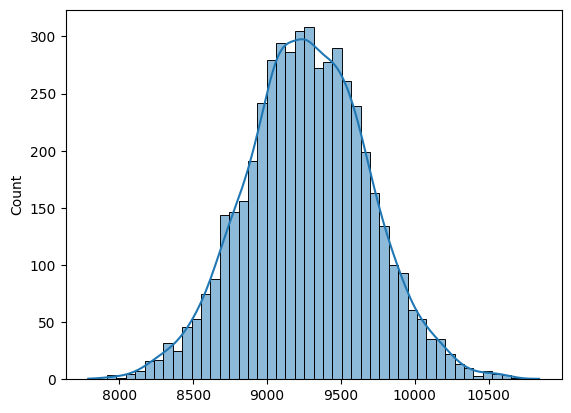

In [ ]:
sns.histplot(s150, kde=True)

plt.show()

In [ ]:
# population mean
avg_purchseamount_by_married_user=round(np.mean(user_married['Purchase']),2)

# population SD
married_sigma = round(np.std(user_married['Purchase']),2)

# mean of sample distributions having sample size = 50
m_mu50 = round(np.mean(s50),2)

# SD of sample distributions having sample size = 50
m_sigma50 = round(np.std(s50),2)

# mean of sample distributions having sample size = 150
m_mu150 = round(np.mean(s150),2)

# SD of sample distributions having sample size = 150
m_sigma150 = round(np.std(s150),2)

print(avg_purchseamount_by_married_user, m_mu50, m_mu150)
print(married_sigma, m_sigma50, m_sigma150)

9261.17 9257.34 9272.16
5016.89 703.24 415.06


In [ ]:
# from given dataset, for married customer we know standard deviation, number of married customers
# and sample and population mean with these deatils we can define the 90 % confidence interval

n = r
sample_mean = avg_purchseamount_by_married_user

# std deviation  sigma/sqrt(n)
std_error = married_sigma/np.sqrt(n)

# We want to construct 90% confidence interval
# So we will have 5% data till z1 so z1 will be
z1 = norm.ppf(0.05)

# z2 will be
z2 = norm.ppf(1 - 0.05)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)


# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 90% confidence interval:",confidence_interval)

 90% confidence interval: (9243.79, 9278.55)


In [ ]:
n = r
sample_mean = avg_purchseamount_by_married_user

# std deviation  sigma/sqrt(n)
std_error = married_sigma/np.sqrt(n)

# We want to construct 95% confidence interval

z1 = norm.ppf(0.025)

# z2 will be
z2 = norm.ppf(1 - 0.025)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)


# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 95% confidence interval:",confidence_interval)

 95% confidence interval: (9240.46, 9281.88)


In [ ]:
n = r
sample_mean = avg_purchseamount_by_married_user

# std deviation  sigma/sqrt(n)
std_error = married_sigma/np.sqrt(n)

# We want to construct 99% confidence interval

z1 = norm.ppf(0.005)

# z2 will be
z2 = norm.ppf(1 - 0.005)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)


# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 99% confidence interval:",confidence_interval)

 99% confidence interval: (9233.95, 9288.39)




*   The average amount spent per purchase by a married customer was **9261.17** and also taken the samples of **50 and 150** respectively and the averge was around **9262.09 and 9261.18** respectively.

Using central limit theorem with confidence interval of 90%, 95%, 99% for amount per transaction by married customers , we can see that the confidence range lies between,

*   At **90%** confidence level , we have data lies around **(9243.79, 9278.55)**

*   At **95%** confidence level , we have data lies around **(9240.46, 9281.88)**

*   At **99%** confidence level , we have data lies around **(9233.95, 9288.39)**







In [ ]:
#users unnmarried

user_unmarried=df[df['Marital_Status']==0]
r,c=user_unmarried.shape
print(r,c)

324731 10


In [ ]:
user_unmarried.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


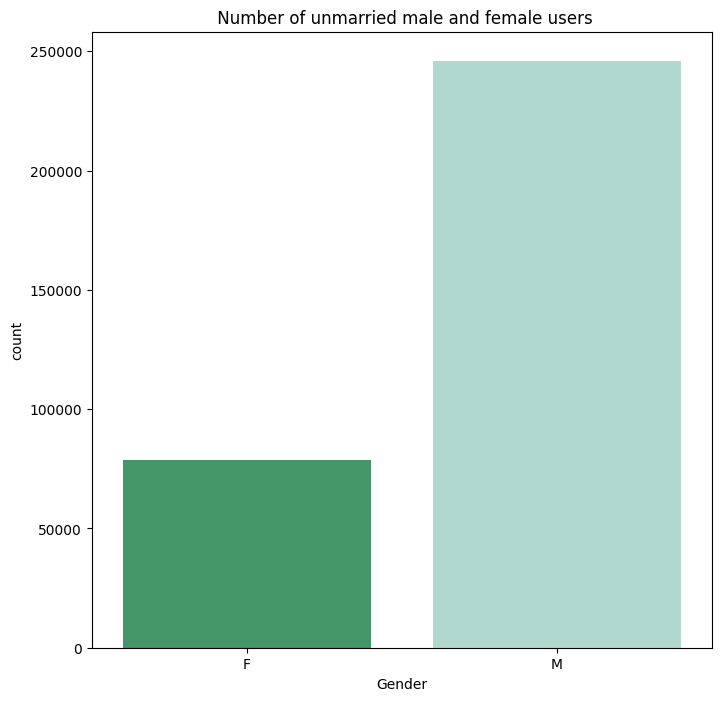

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=user_unmarried,x='Gender',hue='Gender',palette='BuGn_r')
plt.title(" Number of unmarried male and female users")

plt.show()

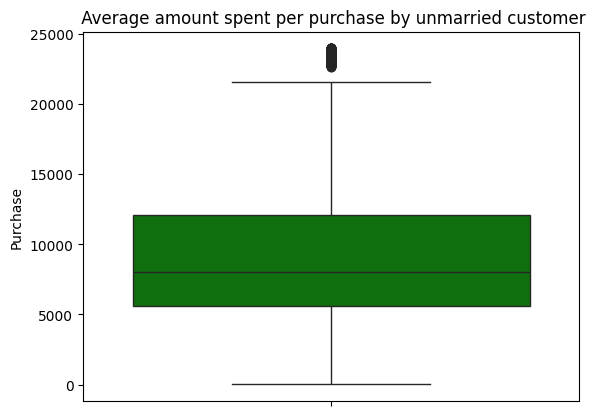

In [ ]:
sns.boxplot(data=user_unmarried,y='Purchase',color='green')
plt.title(" Average amount spent per purchase by unmarried customer")

plt.show()

In [ ]:
user_unmarried['Purchase'].describe()

count    324731.000000
mean       9265.907619
std        5027.347859
min          12.000000
25%        5605.000000
50%        8044.000000
75%       12061.000000
max       23961.000000
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Count'>

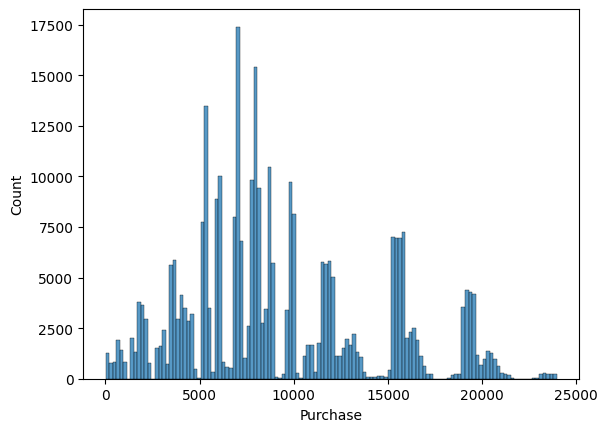

In [ ]:
sns.histplot(user_unmarried['Purchase'])

In [ ]:
#lets take 50 smaples of unmarrired customer and work with 90, 95, 99 confidence interval.

unmarried_s50=[np.mean(user_unmarried['Purchase'].sample(50)) for i in range(5000) ]

#mean for 50 samples
print(np.mean(unmarried_s50))
print(np.std(unmarried_s50))

9267.485623999999
709.2084224102606


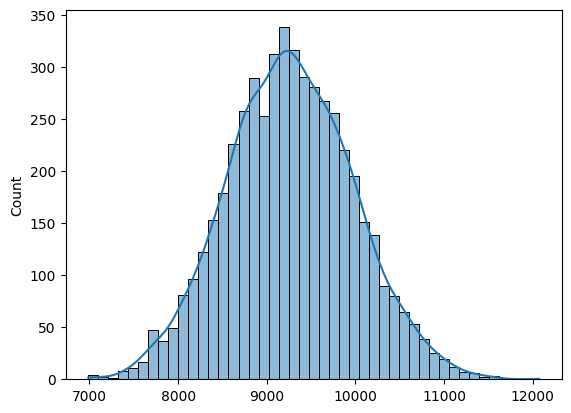

In [ ]:
sns.histplot(unmarried_s50, kde=True)

plt.show()

In [ ]:
#lets take 150 smaples of unmarrired customer and work with 90, 95, 99 confidence interval.

unmarried_s150=[np.mean(user_unmarried['Purchase'].sample(150)) for i in range(5000) ]

#mean for 150 samples
print(np.mean(unmarried_s150))
print(np.std(unmarried_s150))

9259.686020000001
413.27432273396494


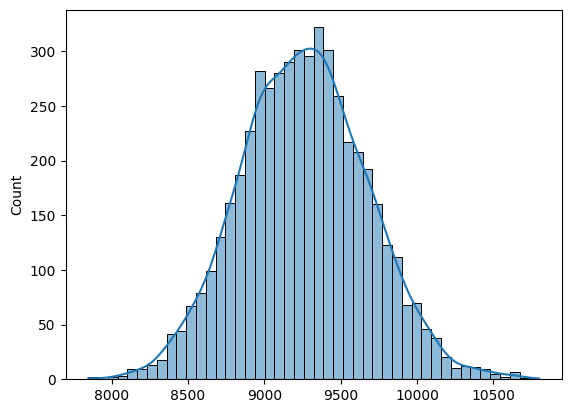

In [ ]:
sns.histplot(unmarried_s150, kde=True)

plt.show()

In [ ]:
# population mean
avg_purchseamount_by_unmarried_user=round(np.mean(user_unmarried['Purchase']),2)

# population SD
unmarried_sigma = round(np.std(user_unmarried['Purchase']),2)

# mean of sample distributions having sample size = 50
unm_mu50 = round(np.mean(unmarried_s50),2)

# SD of sample distributions having sample size = 50
unm_sigma50 = round(np.std(unmarried_s50),2)

# mean of sample distributions having sample size = 150
unm_mu150 = round(np.mean(unmarried_s150),2)

# SD of sample distributions having sample size = 150
unm_sigma150 = round(np.std(unmarried_s150),2)

print(avg_purchseamount_by_unmarried_user, unm_mu50, unm_mu150)
print(unmarried_sigma, unm_sigma50, unm_sigma150)

9265.91 9267.49 9259.69
5027.34 709.21 413.27


In [ ]:
# from given dataset, for unmarried customer we know standard deviation, number of unmarried customers
# and sample and population mean with these deatils we can define the 90 % confidence interval

n = r
sample_mean = avg_purchseamount_by_unmarried_user

# std deviation  sigma/sqrt(n)
std_error = unmarried_sigma/np.sqrt(n)

# We want to construct 90% confidence interval
# So we will have 5% data till z1 so z1 will be
z1 = norm.ppf(0.05)

# z2 will be
z2 = norm.ppf(1 - 0.05)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)


# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 90% confidence interval:",confidence_interval)

 90% confidence interval: (9251.4, 9280.42)


In [ ]:
n = r
sample_mean = avg_purchseamount_by_unmarried_user

# std deviation  sigma/sqrt(n)
std_error = unmarried_sigma/np.sqrt(n)

# We want to construct 95% confidence interval

z1 = norm.ppf(0.025)

# z2 will be
z2 = norm.ppf(1 - 0.025)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)


# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 95% confidence interval:",confidence_interval)

 95% confidence interval: (9248.62, 9283.2)


In [ ]:
n = r
sample_mean = avg_purchseamount_by_unmarried_user

# std deviation  sigma/sqrt(n)
std_error = unmarried_sigma/np.sqrt(n)

# We want to construct 99% confidence interval

z1 = norm.ppf(0.005)

# z2 will be
z2 = norm.ppf(1 - 0.005)

# Confidence interval x1 lower range and x2 upper range of interval
x1 = sample_mean + (z1 * std_error)
x2 = sample_mean + (z2 * std_error)


# Confidence interval [x1, x2]
confidence_interval = (round(x1,2), round(x2,2))

print(" 99% confidence interval:",confidence_interval)

 99% confidence interval: (9243.19, 9288.63)


*   The average amount spent per purchase by a unmarried customer was **9265.91** and also taken the samples of **50 and 150** respectively and the averge was around **9263.98 and 9267.76** respectively.

Using central limit theorem with confidence interval of 90%, 95%, 99% for amount per transaction by unmarried customers , we can see that the confidence range lies between,

*   At **90%** confidence level , we have data lies around **(9251.4, 9280.42)**

*   At **95%** confidence level , we have data lies around **(9248.62, 9283.2)**

*   At **99%** confidence level , we have data lies around **(9243.19, 9288.63)**

#The confidence intervals of average married and unmarried spends are **slightly overlapping **

At 90% Confidence Level:

*   Unmarried Customers: **(9251.4, 9280.42)**
*   Married Customers: **(9243.79, 9278.55)**

There is a **slight overlap** between the confidence intervals for unmarried and married customers at the 90% confidence level.

At 95% Confidence Level:

*   Unmarried Customers: **(9248.62, 9283.2)**
*   Married Customers: **(9240.46, 9281.88)**

There is also a **slight overlap** between the confidence intervals for unmarried and married customers at the 95% confidence level.

At 99% Confidence Level:

*   Unmarried Customers: **(9243.19, 9288.63)**
*   Married Customers: **(9233.95, 9288.39)**

There is a **partial overlap** between the confidence intervals for unmarried and married customers at the 99% confidence level.



In [ ]:
#lets see the numbers of female customers with respect to marital status
f_customer['Marital_Status'].value_counts()

0    78821
1    56988
Name: Marital_Status, dtype: int64

In [ ]:
f_customer_married=f_customer[f_customer['Marital_Status']==1]
f_customer_unmarried=f_customer[f_customer['Marital_Status']==0]

In [ ]:
f_customer_married.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,total_transaction_by_each
29,1000010,P00085942,F,36-45,1,B,4+,1,2,16352,223
30,1000010,P00118742,F,36-45,1,B,4+,1,5,8886,223
31,1000010,P00297942,F,36-45,1,B,4+,1,8,5875,223
32,1000010,P00266842,F,36-45,1,B,4+,1,5,8854,223
33,1000010,P00058342,F,36-45,1,B,4+,1,3,10946,223


In [ ]:
f_customer_unmarried.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,total_transaction_by_each
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,35
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,35
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,35
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,35
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378,47


In [ ]:
f_customer_married['Purchase'].describe()

count    56988.000000
mean      8810.249789
std       4803.594163
min         12.000000
25%       5456.750000
50%       7939.000000
75%      11451.000000
max      23959.000000
Name: Purchase, dtype: float64

In [ ]:
f_customer_unmarried['Purchase'].describe()

count    78821.000000
mean      8679.845815
std       4740.048367
min         12.000000
25%       5417.000000
50%       7895.000000
75%      11370.000000
max      23955.000000
Name: Purchase, dtype: float64

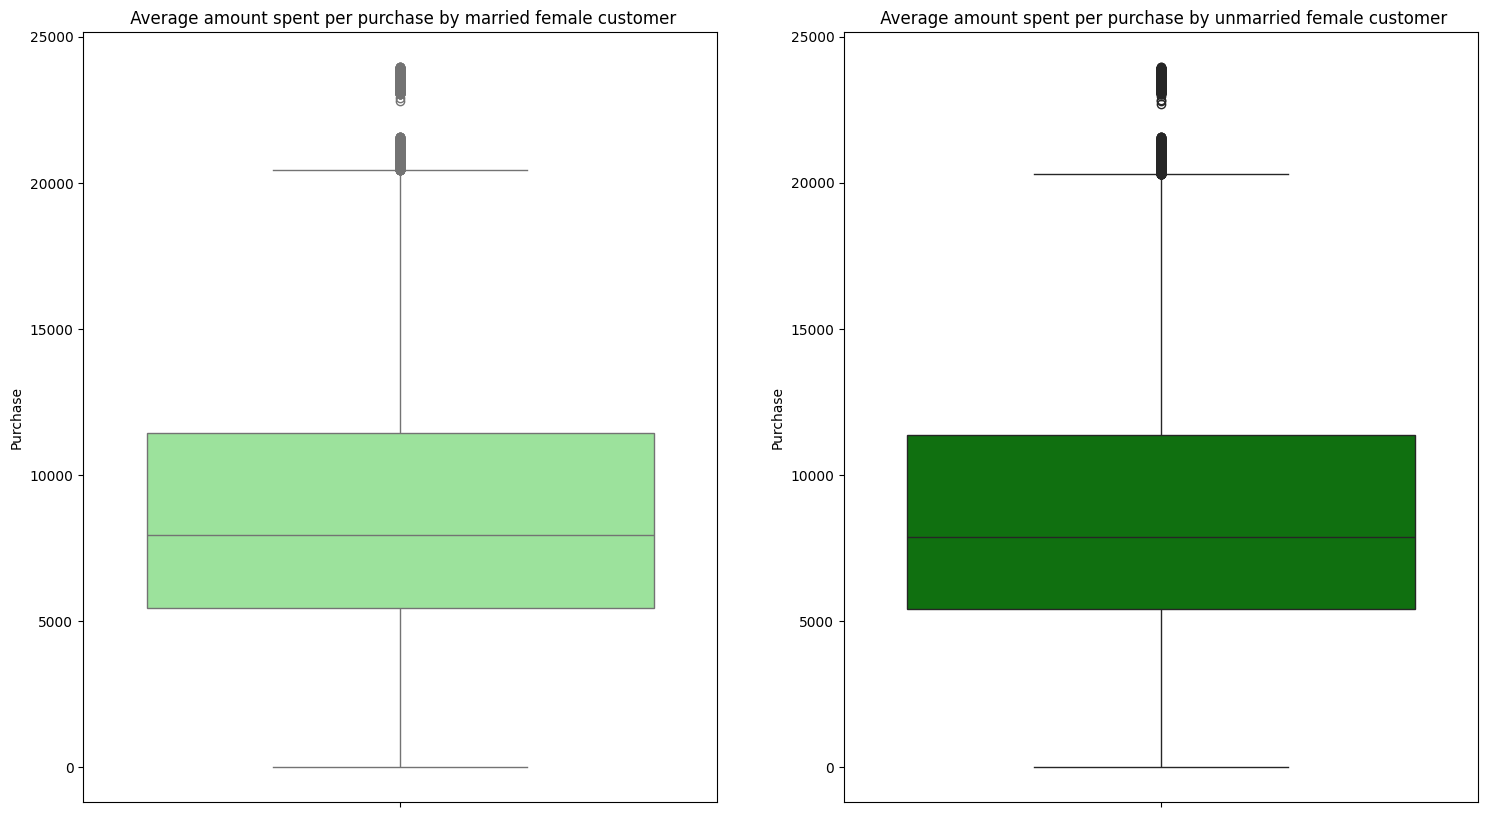

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=f_customer_married,y='Purchase',color='lightgreen')
plt.title(" Average amount spent per purchase by married female customer")

plt.subplot(1, 2, 2)
sns.boxplot(data=f_customer_unmarried,y='Purchase',color='green')
plt.title(" Average amount spent per purchase by unmarried female customer")

plt.show()

We can see that there is **no significant difference** between the amount spend by the female customers despite of being married or unmarried.

The average amount spend by the married and unmarried female customers are
**8810.24 and 8679.84**

In [ ]:
#lets see the numbers of male customers with respect to marital status
m_customer['Marital_Status'].value_counts()

0    245910
1    168349
Name: Marital_Status, dtype: int64

In [ ]:
m_customer_married=m_customer[m_customer['Marital_Status']==1]
m_customer_unmarried=m_customer[m_customer['Marital_Status']==0]

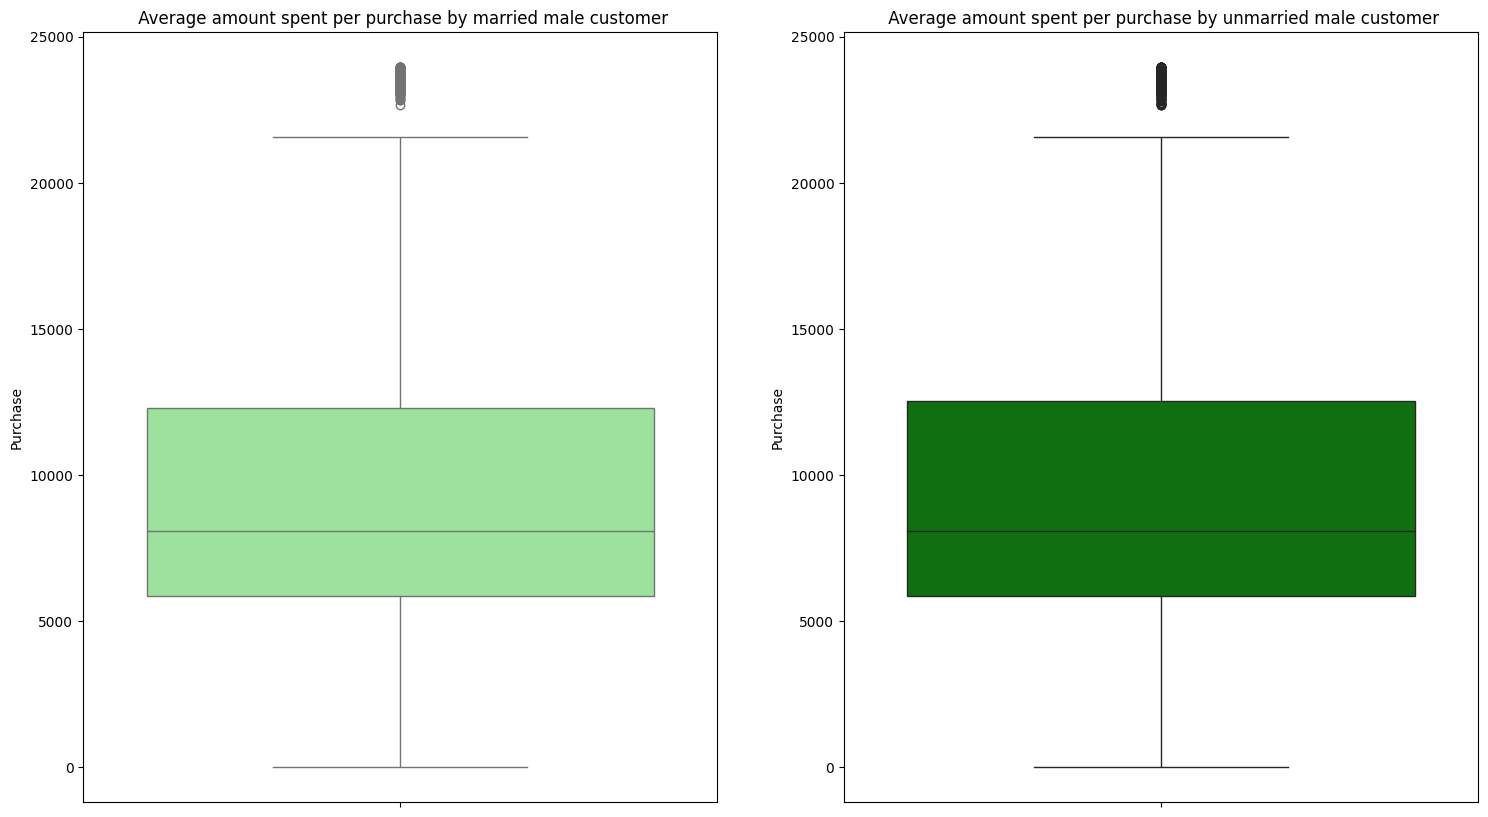

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 2, 1)
sns.boxplot(data=m_customer_married,y='Purchase',color='lightgreen')
plt.title(" Average amount spent per purchase by married male customer")

plt.subplot(1, 2, 2)
sns.boxplot(data=m_customer_unmarried,y='Purchase',color='green')
plt.title(" Average amount spent per purchase by unmarried male customer")

plt.show()

In [ ]:
m_customer_unmarried['Purchase'].describe()

count    245910.000000
mean       9453.756740
std        5101.803346
min          12.000000
25%        5854.000000
50%        8101.000000
75%       12543.000000
max       23961.000000
Name: Purchase, dtype: float64

In [ ]:
m_customer_married['Purchase'].describe()

count    168349.000000
mean       9413.817605
std        5078.027482
min          12.000000
25%        5874.000000
50%        8094.000000
75%       12312.000000
max       23961.000000
Name: Purchase, dtype: float64

We can see that there is **no significant difference** between the amount spend by the male customers despite of being married or unmarried.

The average amount spend by the married and unmarried male customers are
**9413.81 and 9453.75**

#Analysis on Age

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


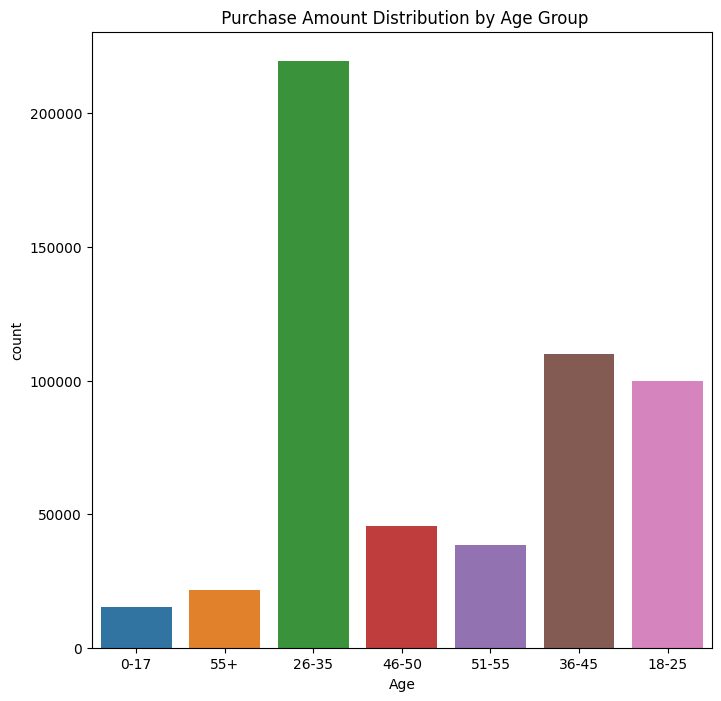

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='Age',hue='Age' ,palette='tab10')
plt.title(" Purchase Amount Distribution by Age Group")

plt.show()

In [ ]:
df['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

For the given dataset we can see that the most number of purchase were done by the customer within the age group of **26-35** which is **219587** purchases.

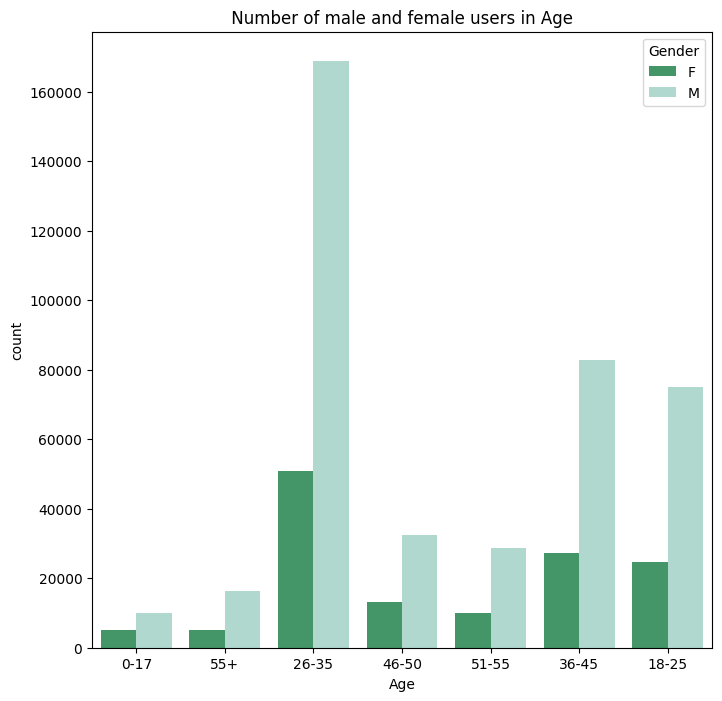

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='Age',hue='Gender',palette='BuGn_r')
plt.title(" Number of male and female users in Age ")

plt.show()

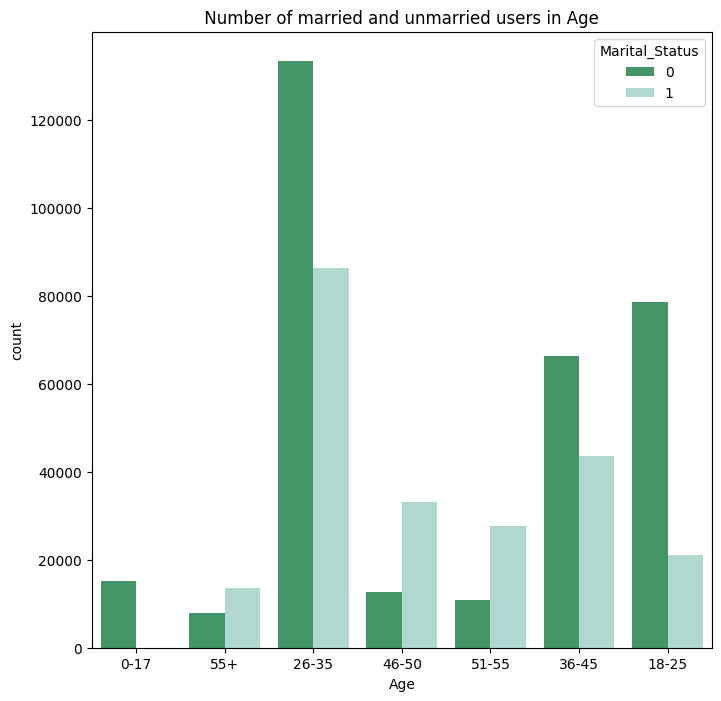

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='Age',hue='Marital_Status',palette='BuGn_r')
plt.title(" Number of married and unmarried users in Age ")

plt.show()

In [ ]:
# lets find confidence interval for age
customer_26_35=df[df['Age']== '26-35']
customer_0_17=df[df['Age']== '0-17']
customer_18_25=df[df['Age']== '18-25']
customer_36_45=df[df['Age']== '36-45']
customer_46_50=df[df['Age']== '46-50']
customer_51_55=df[df['Age']== '51-55']
customer_55plus=df[df['Age']== '55+']

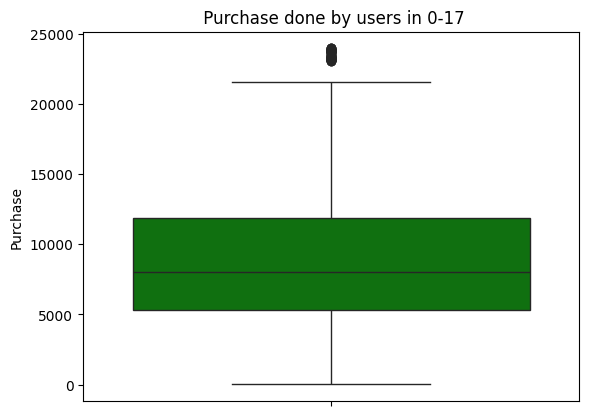

In [ ]:
sns.boxplot(data=customer_0_17,y='Purchase',color='green')
plt.title(" Purchase done by users in 0-17")

plt.show()

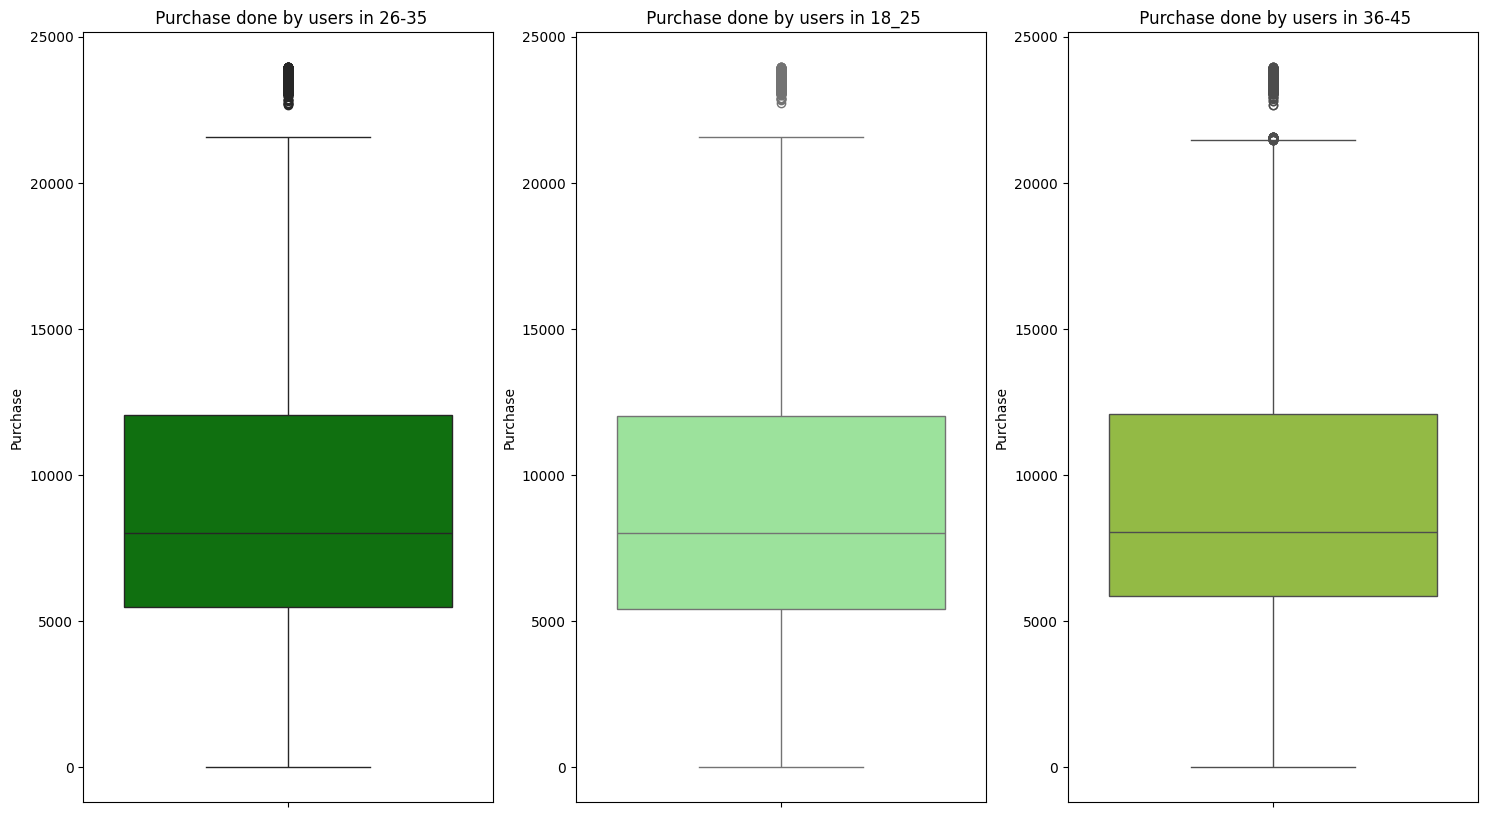

In [ ]:
# lets see the average amount spend per purchase
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
sns.boxplot(data=customer_26_35,y='Purchase',color='green')
plt.title(" Purchase done by users in 26-35")

plt.subplot(1, 3, 2)
sns.boxplot(data=customer_18_25,y='Purchase',color='lightgreen')
plt.title(" Purchase done by users in 18_25")

plt.subplot(1, 3, 3)
sns.boxplot(data=customer_36_45,y='Purchase',color='yellowgreen')
plt.title(" Purchase done by users in 36-45")

plt.show()

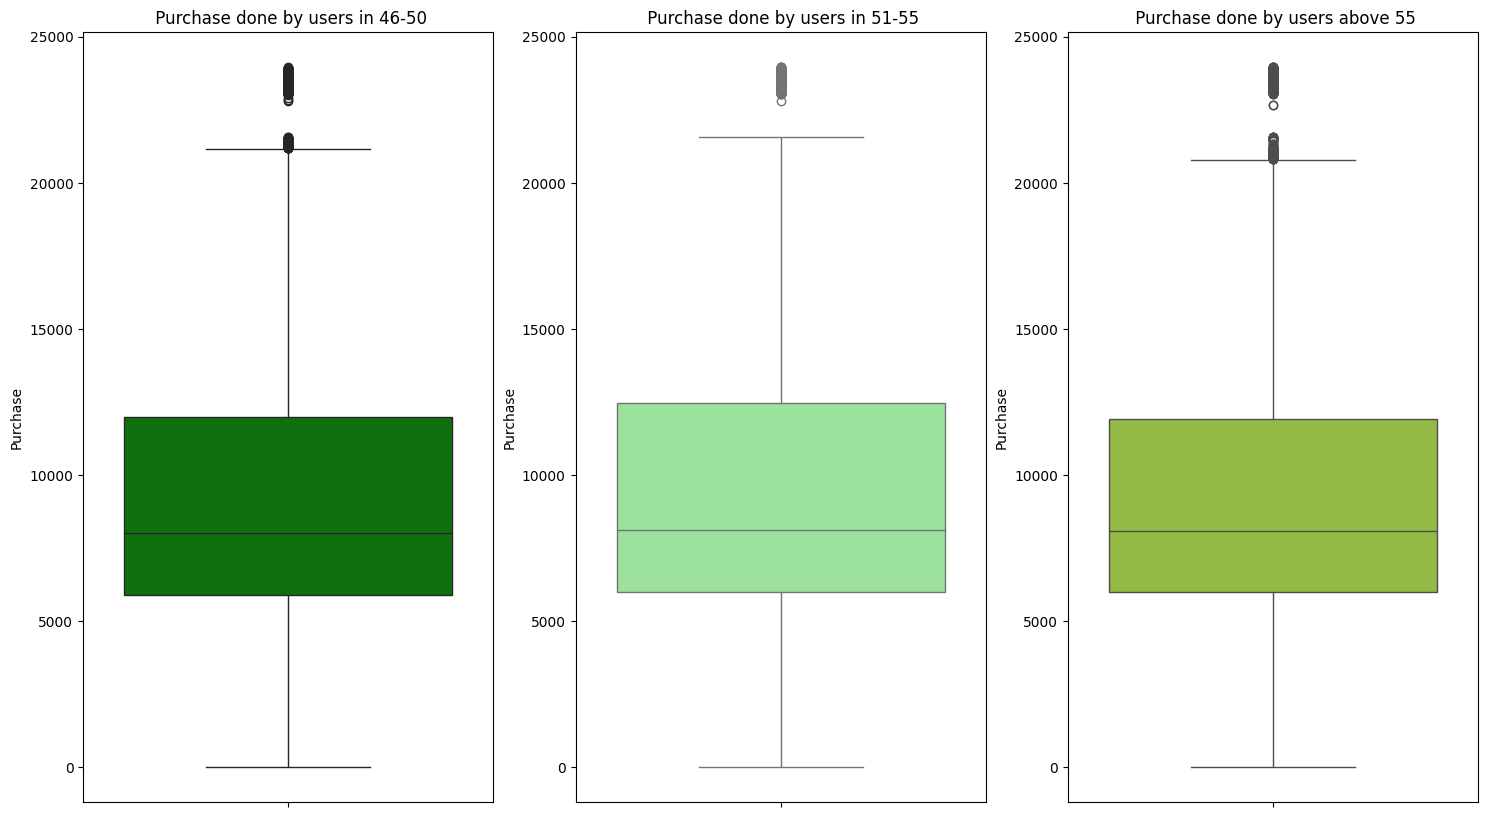

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
sns.boxplot(data=customer_46_50,y='Purchase',color='green')
plt.title(" Purchase done by users in 46-50")

plt.subplot(1, 3, 2)
sns.boxplot(data=customer_51_55,y='Purchase',color='lightgreen')
plt.title(" Purchase done by users in 51-55")

plt.subplot(1, 3, 3)
sns.boxplot(data=customer_55plus,y='Purchase',color='yellowgreen')
plt.title(" Purchase done by users above 55")

plt.show()

In [ ]:
#Average purchase done by different age groups
average_purchase_by_age = df.groupby('Age')['Purchase'].mean()
print(average_purchase_by_age)

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


In [ ]:
# lets do a paired t test to find purchase difference between the age groups with users in 0-17
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(customer_0_17['Purchase'], customer_18_25['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 8.239519755646894e-08
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_0_17['Purchase'], customer_26_35['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 3.9376798537797965e-14
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_0_17['Purchase'], customer_36_45['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 8.449466676352945e-20
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_0_17['Purchase'], customer_46_50['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 4.672627203960438e-09
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_0_17['Purchase'], customer_51_55['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 1.0777926462387446e-34
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_0_17['Purchase'], customer_55plus['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 6.101077737058475e-14
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_18_25['Purchase'], customer_26_35['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 1.4778224581940162e-05
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_18_25['Purchase'], customer_36_45['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 1.9458429431321747e-13
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_18_25['Purchase'], customer_46_50['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 0.1689241737646705
there is no siginficant  difference in amount spend per purchse


In [ ]:
t_stat, p_value = ttest_ind(customer_18_25['Purchase'], customer_51_55['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 1.974192374834648e-33
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_18_25['Purchase'], customer_55plus['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 1.0580371520284403e-05
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_26_35['Purchase'], customer_36_45['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 2.1707534103275795e-05
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_26_35['Purchase'], customer_46_50['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 0.0867103983737533
there is no siginficant  difference in amount spend per purchse


In [ ]:
t_stat, p_value = ttest_ind(customer_26_35['Purchase'], customer_51_55['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 2.8061550000653485e-24
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_26_35['Purchase'], customer_55plus['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 0.019558826196359694
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_36_45['Purchase'], customer_46_50['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 1.0604310938677928e-05
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_36_45['Purchase'], customer_51_55['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 9.281753661269688e-12
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_36_45['Purchase'], customer_55plus['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 0.895237150610117
there is no siginficant  difference in amount spend per purchse


In [ ]:
t_stat, p_value = ttest_ind(customer_46_50['Purchase'], customer_51_55['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 6.255673686048784e-21
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_46_50['Purchase'], customer_55plus['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 0.0019433290265294012
there is a difference in amount spend per purchase between these to age groups


In [ ]:
t_stat, p_value = ttest_ind(customer_51_55['Purchase'], customer_55plus['Purchase'])
print("p_value:",p_value)

if p_value < 0.05:
  print("there is a difference in amount spend per purchase between these to age groups")
else:
  print("there is no siginficant  difference in amount spend per purchse")

p_value: 4.06704468914551e-06
there is a difference in amount spend per purchase between these to age groups


For different age groups we have the average amount spent on per purchase


*   0-17    --   8933.464640
*   18-25   --   9169.663606
*   26-35   --   9252.690633
*   36-45   --   9331.350695
*   46-50   --   9208.625697
*   51-55   --   9534.808031
*   55+     --   9336.280459

To check if we have any **siginificant difference** in amount sepnt on per purchase is different for every groups have used **T-test** and confidence level of 95%.

we have significant difference in almost every age groups but in some cases we have no differences which is


*   Between users in age group **36-45 and in 55plus** we have **no significant difference** in amount spend on per purchase.

*   Between users in age group **18_25 and in 46_50** we have **no significant difference** in amount spend on per purchase.

*   Between users in age group **26_35 and in 46_50** we have **no significant difference** in amount spend on per purchase.



# Analysis on Age , marital status, occupation, stay in current city

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


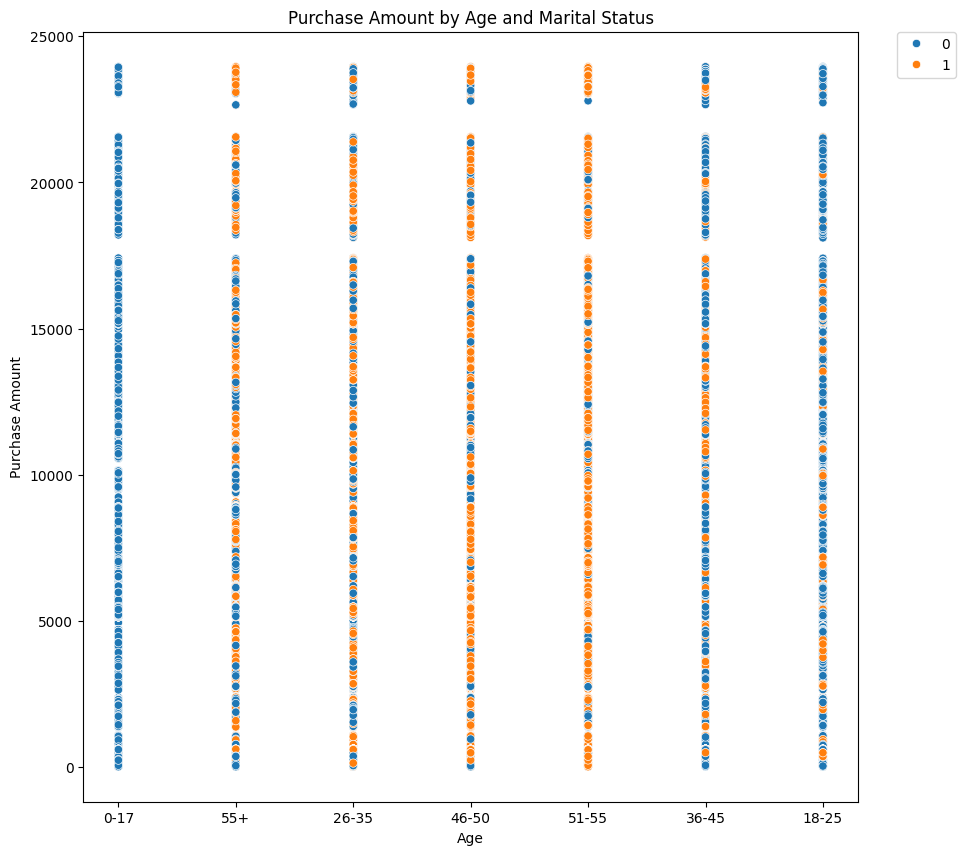

In [ ]:
plt.figure(figsize=(10, 10))


sns.scatterplot(x='Age', y='Purchase', hue='Marital_Status', data=df)


plt.title('Purchase Amount by Age and Marital Status')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

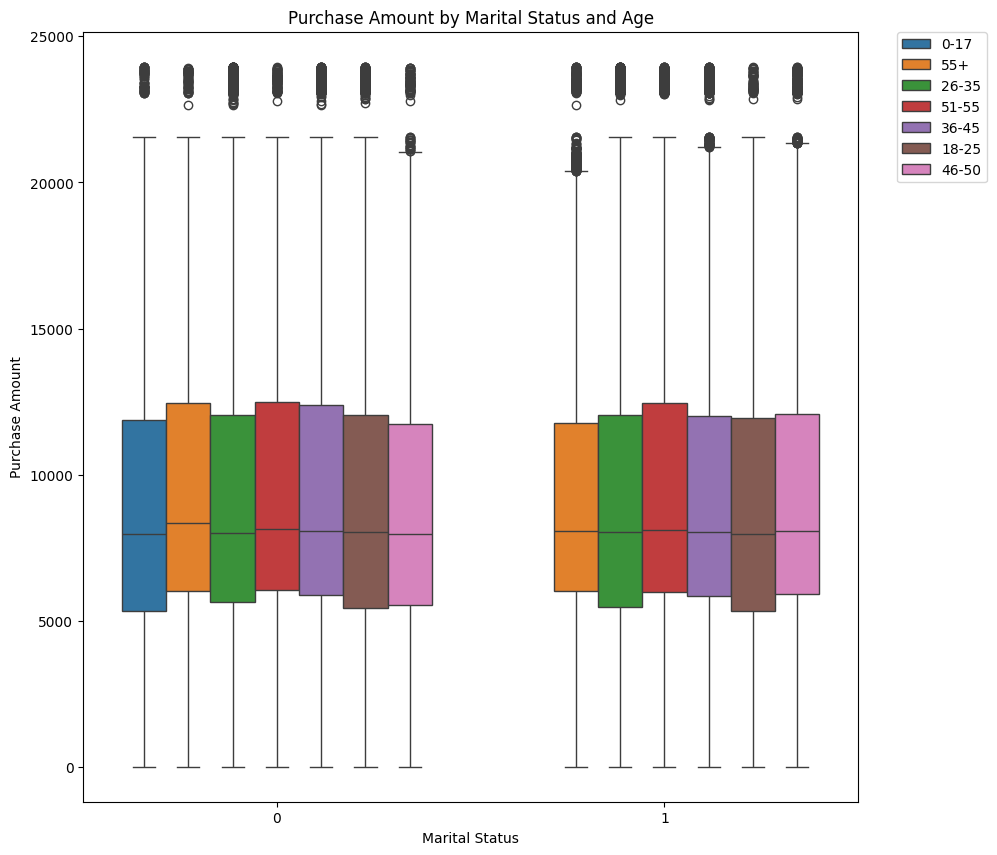

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Marital_Status', y='Purchase', hue='Age', data=df)
plt.title('Purchase Amount by Marital Status and Age')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

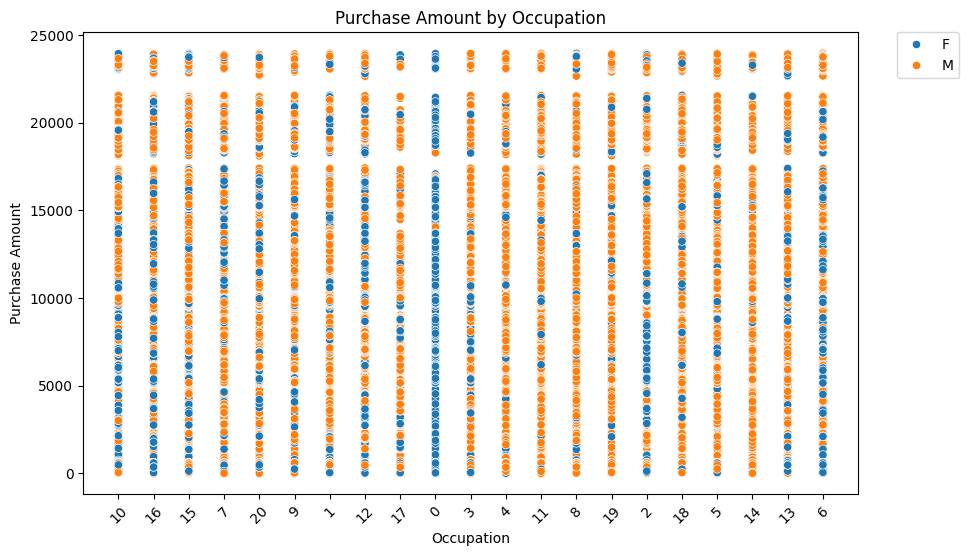

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Occupation', y='Purchase', data=df, hue='Gender')
plt.title('Purchase Amount by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.xticks(range(len(df['Occupation'].unique())), df['Occupation'].unique(), rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

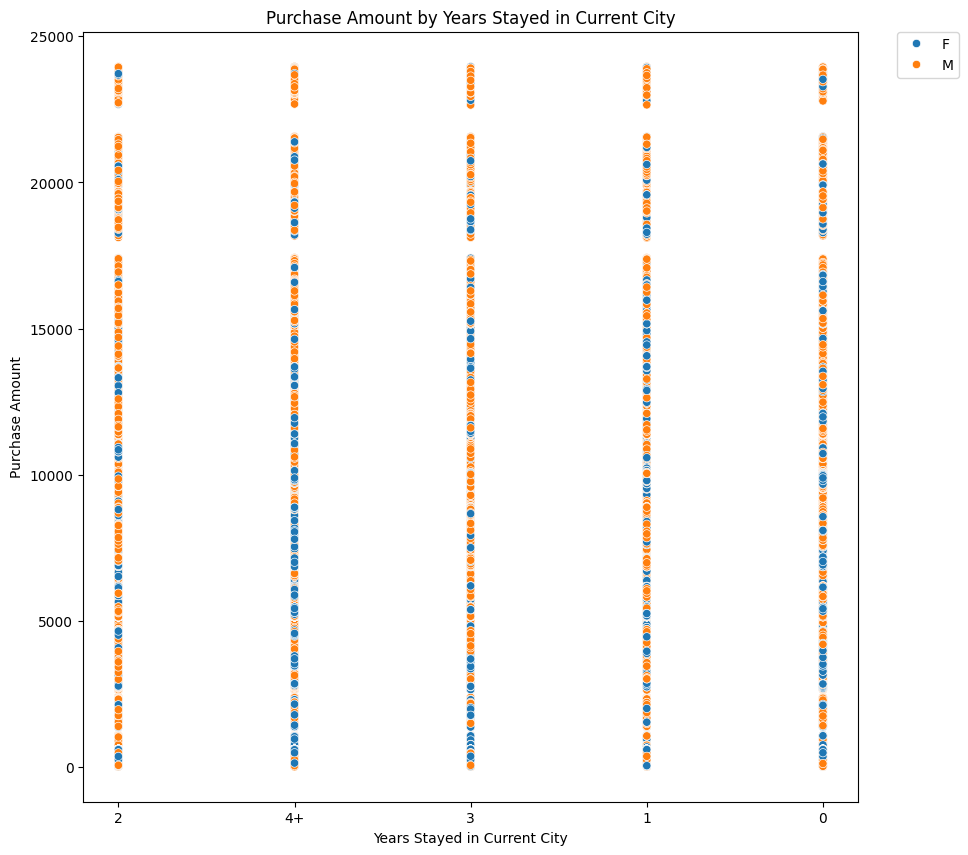

In [ ]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x='Stay_In_Current_City_Years', y='Purchase', data=df , hue='Gender')
plt.title('Purchase Amount by Years Stayed in Current City')
plt.xlabel('Years Stayed in Current City')
plt.ylabel('Purchase Amount')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

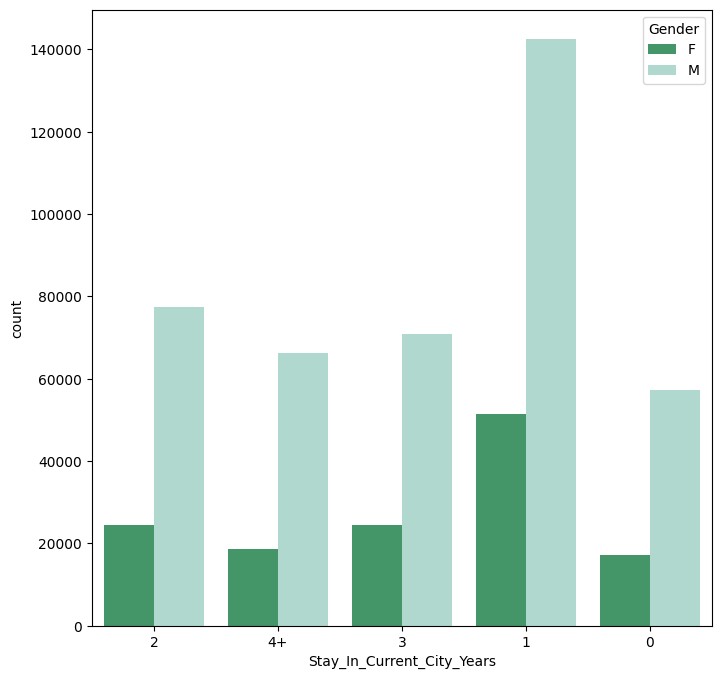

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(data=df,x='Stay_In_Current_City_Years',hue='Gender',palette='BuGn_r')

plt.show()

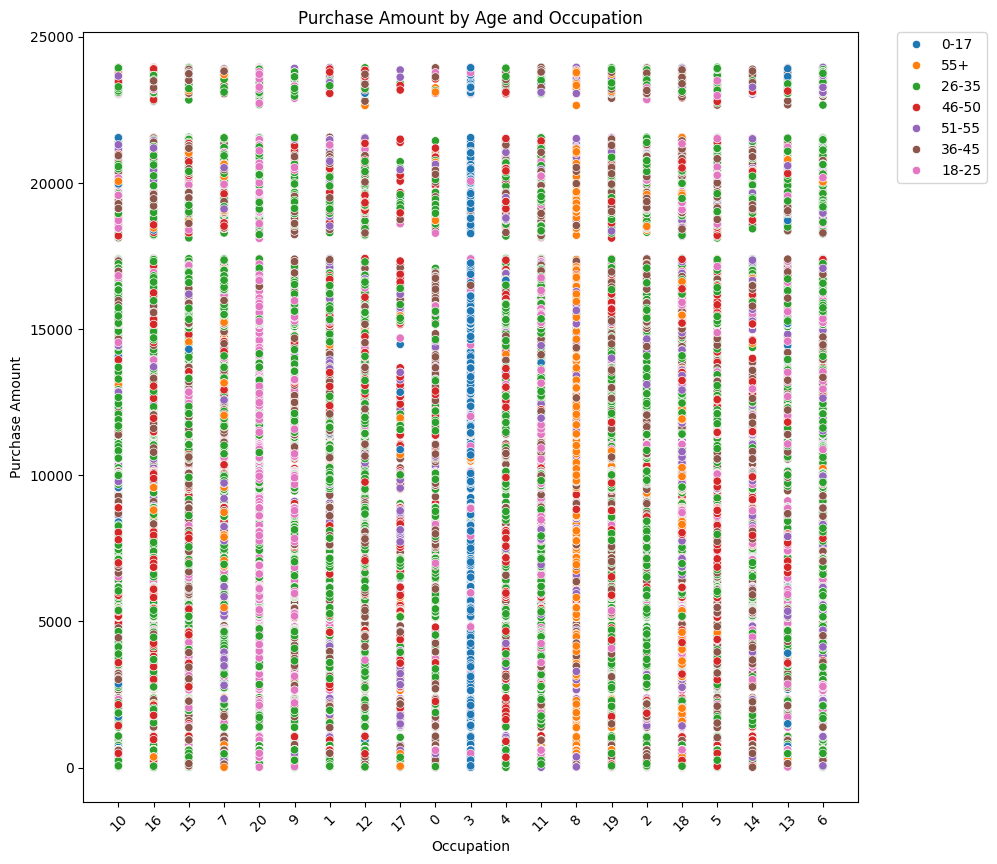

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Occupation', y='Purchase', hue='Age', data=df)
plt.title('Purchase Amount by Age and Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.xticks(range(len(df['Occupation'].unique())), df['Occupation'].unique(), rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.show()

#Recommendations And Insights :

*   There are **1666 female users** with average purchase of **81** and **4225 male** users with average purchase of *98*.

*   The average amount spent on per purchase by male and female customers are **9437.53 and 8734.57**.

*   We have products categorized into **20 category** and category **1,5 and 8** have most number of purchase and most of the purchase is done by male customers.

*   The average amount spent per purchase by a married customer was 9261.17 and unmarried customer was 9265.91. There is no any significant difference in amount spend on the purchase based on marital status.

*   The most numbers of customers are in age group **26-35** with **219587** purchase .

*   To increase the number of feamle users we can promte the fairly purchase products and some discounts.
